# The Hearts of Europe

## Battle of the Neighbourhoods Analysis

## Introduction

Moving to a new city can be a very daunting adventure, especially because of the lack of familiarity with the area. It can be things as simple as knowing the closest supermarket to your daily route or finding your favourite restaurant that can make life exponentially better when they are incorporated into one's life. This is perhaps even more of a significant effect on one's life if they are a student, living on a constrained budget and free time allowance between studies. So, it seems like a natural benefit to know as much as possible in a snapshot analysis of the prospective city. I am facing this situation currently, where I have an option of cities to move to in continuation of postgraduate studies, and knowing how these cities compare and how they are each laid out will be incredibly useful.

## Business Problem

I know that I am not alone in this situation of being entirely unfamiliar with a city but needing to know how best to adapt to the prospective lifestyle, without needing to spend a long time exploring the town to become familiar with it the long way. With the growing globalisation of education, this simple snapshot analysis will become an increasingly useful tool for students when browsing their options, as well as for the institutions which want to advertise the "student life" associated with them. I have seen firsthand how this specific topic is heavily advertised, and it makes sense why, people want to live comfortably, and being in a strange place is often too daunting for it to be worth relocating just because of the university. This will be a mutually beneficial tool to mediate the first impressions of each of the cities and how well they will cater to the individual. The project will rely heavily on location data, in the form of mappable area coordinates as well as the matching Foursquare data, which will then be able to describe each neighbourhood comprehensively in terms of what kinds of venues each has to offer, which creates a snapshot of the essential details of the possible new home of the prospective traveller.

## Data Collection

The data of this problem is obviously the central factor in the project. As such, it is worth a quick glance to see how the overall aim of the project will be formed from the handful of sources. One of the most valuable data sources in this project is that which provides the location data of the neighbourhoods in the cities under analysis, so that it can be cleanly and comprehensively visualised. To accomplish this goal, with the added benefit of consistency among the cities, the data is sourced from the Inside Airbnb database (http://insideairbnb.com/get-the-data.html). This database provides an incredible wealth of data, in many different forms. The particular file which is used for each city is a `geojson` file (as deipcted in the cell below), which provides the neighbourhood name `neighbourhood`, borough name `neighbourhood_group`, and the map shape of each neighbourhood `geometry`, from which we can extract the coordinates and nicely present the maps of the cities. This location data can then be seamlessly coupled with the Foursquare databases, through the name of each neighbourhood. This then allows for the access to all of the venue data of the neighbourhoods, and as such only these two databases are required for the project, minimising the room for error and maximising the consistency in the data as if all of the information was being sourced from one enormous database.

In [1]:
import geopandas as gpd

munich_neighbourhoods_df = gpd.read_file('Data/neighbourhoods_mu.geojson')

munich_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48..."
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48..."
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48..."
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48..."
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48..."


### Berlin - Zurich - Geneva - London

We must first import all of the necessary libraries and packages.

In [2]:
# !pip install beautifulsoup4
# !pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
import descartes
plt.style.use('seaborn')

from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


And now begin the initial data extraction, which involves getting the neighbourhood location data and cleaning it into a mappable form for each of the cities.

# Munich, Germany

In [3]:
munich_neighbourhoods_df = gpd.read_file('Data/neighbourhoods_mu.geojson')

munich_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48..."
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48..."
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48..."
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48..."
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48..."


In [4]:
munich_neighbourhoods_df['centroids'] = munich_neighbourhoods_df.centroid
munich_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry,centroids
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",POINT (11.58318 48.14127)
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",POINT (11.56122 48.13015)
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",POINT (11.56430 48.14807)
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",POINT (11.56931 48.16654)
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",POINT (11.59476 48.12973)


In [5]:
mn_df = pd.DataFrame()
mn_df['Neighbourhood'] = munich_neighbourhoods_df['neighbourhood']
mn_df.head()

,Neighbourhood
0,Altstadt-Lehel
1,Ludwigsvorstadt-Isarvorstadt
2,Maxvorstadt
3,Schwabing-West
4,Au-Haidhausen


In [6]:
float(str(munich_neighbourhoods_df['centroids'][10])[7:-1].split(" ")[0])
len(munich_neighbourhoods_df['centroids'])

latlst = []
lonlst = []
i = 0
c = 0

while i <= len(munich_neighbourhoods_df['centroids']) - 1:
    if munich_neighbourhoods_df.index[c] == i:
        lonlst.append(float(str(munich_neighbourhoods_df['centroids'][i])[7:-1].split(" ")[0]))
        latlst.append(float(str(munich_neighbourhoods_df['centroids'][i])[7:-1].split(" ")[1]))
        c += 1
    i += 1

munich_neighbourhoods_df['lat'] = latlst
munich_neighbourhoods_df['lon'] = lonlst

munich_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry,centroids,lat,lon
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",POINT (11.58318 48.14127),48.141273,11.583178
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",POINT (11.56122 48.13015),48.130152,11.561218
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",POINT (11.56430 48.14807),48.148069,11.564298
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",POINT (11.56931 48.16654),48.166539,11.569307
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",POINT (11.59476 48.12973),48.129727,11.594758


In [7]:
mn_df['Latitude'] = munich_neighbourhoods_df['lat']
mn_df['Longitude'] = munich_neighbourhoods_df['lon']
mn_df.head()

,Neighbourhood,Latitude,Longitude
0,Altstadt-Lehel,48.141273,11.583178
1,Ludwigsvorstadt-Isarvorstadt,48.130152,11.561218
2,Maxvorstadt,48.148069,11.564298
3,Schwabing-West,48.166539,11.569307
4,Au-Haidhausen,48.129727,11.594758


In [8]:
address = 'Munich, Germany'

geolocator = Nominatim(user_agent="be_explorer")
location_Munich = geolocator.geocode(address)
latitude_Munich = location_Munich.latitude
longitude_Munich = location_Munich.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude_Munich, longitude_Munich))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


In [9]:
mu_uni = 'Technical University of Munich'
mu_lat = 48.149
mu_lon = 11.567

In [10]:
# create map of Munich using latitude and longitude values
map_munich = folium.Map(location=[latitude_Munich, longitude_Munich], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(munich_neighbourhoods_df['lat'],
                                   munich_neighbourhoods_df['lon'],
                                   munich_neighbourhoods_df['neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)

lab = '{}'.format(mu_uni)
lab = folium.Popup(lab, parse_html=True)
folium.CircleMarker(
    [mu_lat, mu_lon],
    radius=5,
    popup=lab,
    color='red',
    fill=True,
    fill_opacity=0.7,
    parse_html=False).add_to(map_munich)
    
map_munich

# Zurich, Switzerland

In [11]:
zu_neighbourhoods_df = gpd.read_file('Data/neighbourhoods_zurich.geojson')

zu_neighbourhoods_df = zu_neighbourhoods_df \
    [~ zu_neighbourhoods_df['neighbourhood_group'].isnull()]

zu_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Hirslanden,Kreis 7,"MULTIPOLYGON (((8.55670 47.36406, 8.55682 47.3..."
1,Weinegg,Kreis 8,"MULTIPOLYGON (((8.55670 47.36405, 8.55672 47.3..."
2,Mühlebach,Kreis 8,"MULTIPOLYGON (((8.55423 47.36456, 8.55426 47.3..."
3,Seefeld,Kreis 8,"MULTIPOLYGON (((8.54795 47.36500, 8.54805 47.3..."
4,Werd,Kreis 4,"MULTIPOLYGON (((8.53300 47.37394, 8.53299 47.3..."


In [12]:
zu_neighbourhoods_df['centroids'] = zu_neighbourhoods_df.centroid
zu_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry,centroids
0,Hirslanden,Kreis 7,"MULTIPOLYGON (((8.55670 47.36406, 8.55682 47.3...",POINT (8.57540 47.36476)
1,Weinegg,Kreis 8,"MULTIPOLYGON (((8.55670 47.36405, 8.55672 47.3...",POINT (8.56941 47.35397)
2,Mühlebach,Kreis 8,"MULTIPOLYGON (((8.55423 47.36456, 8.55426 47.3...",POINT (8.55666 47.35787)
3,Seefeld,Kreis 8,"MULTIPOLYGON (((8.54795 47.36500, 8.54805 47.3...",POINT (8.55161 47.35246)
4,Werd,Kreis 4,"MULTIPOLYGON (((8.53300 47.37394, 8.53299 47.3...",POINT (8.52682 47.37209)


In [13]:
zn_df = pd.DataFrame()
zn_df['Neighbourhood'] = zu_neighbourhoods_df['neighbourhood']
zn_df.head()

,Neighbourhood
0,Hirslanden
1,Weinegg
2,Mühlebach
3,Seefeld
4,Werd


In [14]:
float(str(zu_neighbourhoods_df['centroids'][10])[7:-1].split(" ")[0])
len(zu_neighbourhoods_df['centroids'])

latlst = []
lonlst = []
i = 0
c = 0

while i <= len(zu_neighbourhoods_df['centroids']) - 1:
    if zu_neighbourhoods_df.index[c] == i:
        lonlst.append(float(str(zu_neighbourhoods_df['centroids'][i])[7:-1].split(" ")[0]))
        latlst.append(float(str(zu_neighbourhoods_df['centroids'][i])[7:-1].split(" ")[1]))
        c += 1
    i += 1

zu_neighbourhoods_df['lon'] = lonlst
zu_neighbourhoods_df['lat'] = latlst

zu_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry,centroids,lon,lat
0,Hirslanden,Kreis 7,"MULTIPOLYGON (((8.55670 47.36406, 8.55682 47.3...",POINT (8.57540 47.36476),8.575400,47.364757
1,Weinegg,Kreis 8,"MULTIPOLYGON (((8.55670 47.36405, 8.55672 47.3...",POINT (8.56941 47.35397),8.569414,47.353972
2,Mühlebach,Kreis 8,"MULTIPOLYGON (((8.55423 47.36456, 8.55426 47.3...",POINT (8.55666 47.35787),8.556663,47.357866
3,Seefeld,Kreis 8,"MULTIPOLYGON (((8.54795 47.36500, 8.54805 47.3...",POINT (8.55161 47.35246),8.551609,47.352464
4,Werd,Kreis 4,"MULTIPOLYGON (((8.53300 47.37394, 8.53299 47.3...",POINT (8.52682 47.37209),8.526816,47.372089


In [15]:
zn_df['Latitude'] = zu_neighbourhoods_df['lat']
zn_df['Longitude'] = zu_neighbourhoods_df['lon']
zn_df.head()

,Neighbourhood,Latitude,Longitude
0,Hirslanden,47.364757,8.575400
1,Weinegg,47.353972,8.569414
2,Mühlebach,47.357866,8.556663
3,Seefeld,47.352464,8.551609
4,Werd,47.372089,8.526816


In [16]:
address = 'Zurich'

geolocator = Nominatim(user_agent="zu_explorer")
location_Zurich = geolocator.geocode(address)
latitude_Zurich = location_Zurich.latitude
longitude_Zurich = location_Zurich.longitude
print('The geograpical coordinates of Zurich are {}, {}.'.format(latitude_Zurich, longitude_Zurich))

The geograpical coordinates of Zurich are 47.3744489, 8.5410422.


In [17]:
zu_uni = 'ETH Zurich'
zu_lat = 47.376389
zu_lon = 8.548056

In [18]:
# create map of Zurich using latitude and longitude values
map_zu = folium.Map(location=[latitude_Zurich, longitude_Zurich], zoom_start=12)

# add markers to map
for lat, lng, neighbourhood_group, neighbourhood in zip(zu_neighbourhoods_df['lat'],
                                                        zu_neighbourhoods_df['lon'],
                                                        zu_neighbourhoods_df['neighbourhood_group'],
                                                        zu_neighbourhoods_df['neighbourhood']):
    label = '{}, {}'.format(neighbourhood, neighbourhood_group)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zu)  
    
lab = '{}'.format(zu_uni)
lab = folium.Popup(lab, parse_html=True)
folium.CircleMarker(
    [zu_lat, zu_lon],
    radius=5,
    popup=lab,
    color='red',
    fill=True,
    fill_opacity=0.7,
    parse_html=False).add_to(map_zu)

map_zu

# Geneva, Switzerland

In [19]:
ge_neighbourhoods_df = gpd.read_file('Data/neighbourhoods_geneva.geojson')

ge_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Plan-les-Ouates,None,"MULTIPOLYGON (((6.14037 46.16705, 6.14037 46.1..."
1,Lancy,None,"MULTIPOLYGON (((6.12763 46.18738, 6.12768 46.1..."
2,Meinier,None,"MULTIPOLYGON (((6.24646 46.22662, 6.24622 46.2..."
3,Carouge,None,"MULTIPOLYGON (((6.14102 46.17343, 6.14102 46.1..."
4,Aire-la-Ville,None,"MULTIPOLYGON (((6.03181 46.19917, 6.03182 46.1..."


In [20]:
ge_neighbourhoods_df['centroids'] = ge_neighbourhoods_df.centroid
ge_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry,centroids
0,Plan-les-Ouates,None,"MULTIPOLYGON (((6.14037 46.16705, 6.14037 46.1...",POINT (6.11906 46.16393)
1,Lancy,None,"MULTIPOLYGON (((6.12763 46.18738, 6.12768 46.1...",POINT (6.11961 46.18490)
2,Meinier,None,"MULTIPOLYGON (((6.24646 46.22662, 6.24622 46.2...",POINT (6.23510 46.24300)
3,Carouge,None,"MULTIPOLYGON (((6.14102 46.17343, 6.14102 46.1...",POINT (6.14035 46.18167)
4,Aire-la-Ville,None,"MULTIPOLYGON (((6.03181 46.19917, 6.03182 46.1...",POINT (6.04223 46.19023)


In [21]:
gn_df = pd.DataFrame()
gn_df['Neighbourhood'] = ge_neighbourhoods_df['neighbourhood']
gn_df.head()

,Neighbourhood
0,Plan-les-Ouates
1,Lancy
2,Meinier
3,Carouge
4,Aire-la-Ville


In [22]:
float(str(ge_neighbourhoods_df['centroids'][10])[7:-1].split(" ")[0])
len(ge_neighbourhoods_df['centroids'])

latlst = []
lonlst = []
i = 0
c = 0

while i <= len(ge_neighbourhoods_df['centroids']) - 1:
    if ge_neighbourhoods_df.index[c] == i:
        lonlst.append(float(str(ge_neighbourhoods_df['centroids'][i])[7:-1].split(" ")[0]))
        latlst.append(float(str(ge_neighbourhoods_df['centroids'][i])[7:-1].split(" ")[1]))
        c += 1
    i += 1

ge_neighbourhoods_df['lon'] = lonlst
ge_neighbourhoods_df['lat'] = latlst

ge_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry,centroids,lon,lat
0,Plan-les-Ouates,None,"MULTIPOLYGON (((6.14037 46.16705, 6.14037 46.1...",POINT (6.11906 46.16393),6.119057,46.163930
1,Lancy,None,"MULTIPOLYGON (((6.12763 46.18738, 6.12768 46.1...",POINT (6.11961 46.18490),6.119612,46.184896
2,Meinier,None,"MULTIPOLYGON (((6.24646 46.22662, 6.24622 46.2...",POINT (6.23510 46.24300),6.235095,46.243001
3,Carouge,None,"MULTIPOLYGON (((6.14102 46.17343, 6.14102 46.1...",POINT (6.14035 46.18167),6.140353,46.181673
4,Aire-la-Ville,None,"MULTIPOLYGON (((6.03181 46.19917, 6.03182 46.1...",POINT (6.04223 46.19023),6.042232,46.190231


In [23]:
gn_df['Latitude'] = ge_neighbourhoods_df['lat']
gn_df['Longitude'] = ge_neighbourhoods_df['lon']
gn_df.head()

,Neighbourhood,Latitude,Longitude
0,Plan-les-Ouates,46.163930,6.119057
1,Lancy,46.184896,6.119612
2,Meinier,46.243001,6.235095
3,Carouge,46.181673,6.140353
4,Aire-la-Ville,46.190231,6.042232


In [24]:
address = 'Geneva'

geolocator = Nominatim(user_agent="ge_explorer")
location_Geneva = geolocator.geocode(address)
latitude_Geneva = location_Geneva.latitude
longitude_Geneva = location_Geneva.longitude
print('The geograpical coordinates of Geneva are {}, {}.'.format(latitude_Geneva, longitude_Geneva))

The geograpical coordinates of Geneva are 46.2017559, 6.1466014.


In [25]:
ge_uni = 'University of Geneva'
ge_lat = 46.199347
ge_lon = 6.145030

In [26]:
# create map of Geneva using latitude and longitude values
map_ge = folium.Map(location=[latitude_Geneva, longitude_Geneva], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(ge_neighbourhoods_df['lat'],
                                                        ge_neighbourhoods_df['lon'],
                                                        ge_neighbourhoods_df['neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ge)  
    
lab = '{}'.format(ge_uni)
lab = folium.Popup(lab, parse_html=True)
folium.CircleMarker(
    [ge_lat, ge_lon],
    radius=5,
    popup=lab,
    color='red',
    fill=True,
    fill_opacity=0.7,
    parse_html=False).add_to(map_ge)

map_ge

# London, England

In [27]:
lo_neighbourhoods_df = gpd.read_file('Data/neighbourhoods_london.geojson')

lo_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51..."
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


In [28]:
lo_neighbourhoods_df['centroids'] = lo_neighbourhoods_df.centroid
lo_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry,centroids
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",POINT (-0.28690 51.38791)
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51...",POINT (-0.08716 51.35533)
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...",POINT (0.05152 51.37200)
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...",POINT (-0.36712 51.46838)
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...",POINT (-0.33103 51.52247)


In [29]:
ln_df = pd.DataFrame()
ln_df['Neighbourhood'] = lo_neighbourhoods_df['neighbourhood']
ln_df.head()

,Neighbourhood
0,Kingston upon Thames
1,Croydon
2,Bromley
3,Hounslow
4,Ealing


In [30]:
float(str(lo_neighbourhoods_df['centroids'][10])[7:-1].split(" ")[0])
len(lo_neighbourhoods_df['centroids'])

latlst = []
lonlst = []
i = 0
c = 0

while i <= len(lo_neighbourhoods_df['centroids']) - 1:
    if lo_neighbourhoods_df.index[c] == i:
        lonlst.append(float(str(lo_neighbourhoods_df['centroids'][i])[7:-1].split(" ")[0]))
        latlst.append(float(str(lo_neighbourhoods_df['centroids'][i])[7:-1].split(" ")[1]))
        c += 1
    i += 1

lo_neighbourhoods_df['lon'] = lonlst
lo_neighbourhoods_df['lat'] = latlst

lo_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry,centroids,lon,lat
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",POINT (-0.28690 51.38791),-0.286900,51.387906
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51...",POINT (-0.08716 51.35533),-0.087157,51.355335
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...",POINT (0.05152 51.37200),0.051524,51.371999
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...",POINT (-0.36712 51.46838),-0.367123,51.468378
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...",POINT (-0.33103 51.52247),-0.331026,51.522475


In [31]:
ln_df['Latitude'] = lo_neighbourhoods_df['lat']
ln_df['Longitude'] = lo_neighbourhoods_df['lon']
ln_df.head()

,Neighbourhood,Latitude,Longitude
0,Kingston upon Thames,51.387906,-0.286900
1,Croydon,51.355335,-0.087157
2,Bromley,51.371999,0.051524
3,Hounslow,51.468378,-0.367123
4,Ealing,51.522475,-0.331026


In [32]:
address = 'London, England'

geolocator = Nominatim(user_agent="lo_explorer")
location_London = geolocator.geocode(address)
latitude_London = location_London.latitude
longitude_London = location_London.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude_London, longitude_London))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [33]:
lo_uni = 'Imperial College London'
lo_lat = 51.498755
lo_lon = -0.175651

In [34]:
# create map of London using latitude and longitude values
map_lo = folium.Map(location=[latitude_London, longitude_London], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(lo_neighbourhoods_df['lat'],
                                   lo_neighbourhoods_df['lon'],
                                   lo_neighbourhoods_df['neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lo)  
    
lab = '{}'.format(lo_uni)
lab = folium.Popup(lab, parse_html=True)
folium.CircleMarker(
    [lo_lat, lo_lon],
    radius=5,
    popup=lab,
    color='red',
    fill=True,
    fill_opacity=0.7,
    parse_html=False).add_to(map_lo)

map_lo

# Foursquare

Now that the maps have been made and we have our list of neighbourhoods, we can fill out the details of them all with the venue data, which all comes from the Foursquare API. So we begin with obtaining access to the API and pulling the necessary data.

In [82]:
CLIENT_ID = 'Client ID' # your Foursquare ID
CLIENT_SECRET = 'Client Secret' # your Foursquare Secret
ACCESS_TOKEN = 'Access Token' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Client ID
CLIENT_SECRET:Client Secret


In [36]:
LIMIT=100
 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
 
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT
            )
 
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
 
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])
 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                             'Neighbourhood Latitude', 
                             'Neighbourhood Longitude', 
                             'Venue', 
                             'Venue Category']
 
    return nearby_venues

In [37]:
def explore_city(df):
    venues =  getNearbyVenues(names = df['Neighbourhood'],latitudes = df['Latitude'],
                                 longitudes = df['Longitude'])

    onehot_df = pd.get_dummies(venues[['Venue Category']], prefix= "", prefix_sep= "")

    # # add neighborhood column back to dataframe
    onehot_df['Neighbourhood'] = venues['Neighbourhood']
    # move neighborhood column to the first column
    fixed_columns = [onehot_df.columns[-1]] + list(onehot_df.columns[:-1])
    onehot_df = onehot_df[fixed_columns]
    onehot_df_grouped = onehot_df.groupby('Neighbourhood').mean().reset_index()
    
    onehot_coded_df = pd.merge(df, onehot_df_grouped, on = 'Neighbourhood', how = 'left')
    
    return onehot_coded_df

In [38]:
def return_venues_for_cities(df):
    col = list(df.columns)
    all_venues = pd.DataFrame()
    
    a = explore_city(df)
    all_venues = pd.concat([a, all_venues], axis = 0, ignore_index = True, sort = True)
    cols = col + [j for j in all_venues.columns if j not in col]
    all_venues = all_venues[cols]
    return all_venues

Now we have accessed the API and created the necessary functions for pulling the data, we can begin forming the data frames for each city which will be used in the ranking and the clustering models.

# Munich

In [39]:
try:
    df1 = pd.read_csv('Munich_venue.csv')
except:
    df1 = return_venues_for_cities(mn_df)
#     df1.fillna(0,  inplace = True)
    df1.to_csv('Munich_venue.csv',  index_label = False)
print('Shape data is: ', df1.shape)
df1.head()

Shape data is:  (25, 143)


,Neighbourhood,Latitude,Longitude,Afghan Restaurant,American Restaurant,Aquarium,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio,Zoo Exhibit
0,Altstadt-Lehel,48.141273,11.583178,0.000000,0.0,0.0,0.000000,0.028571,0.000000,0.028571,...,0.0,0.0,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,Ludwigsvorstadt-Isarvorstadt,48.130152,11.561218,0.000000,0.0,0.0,0.000000,0.000000,0.021739,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.108696,0.021739,0.0,0.0
2,Maxvorstadt,48.148069,11.564298,0.017544,0.0,0.0,0.017544,0.035088,0.052632,0.000000,...,0.0,0.0,0.017544,0.000000,0.000000,0.000000,0.017544,0.000000,0.0,0.0
3,Schwabing-West,48.166539,11.569307,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.093750,0.000000,0.0,0.0
4,Au-Haidhausen,48.129727,11.594758,0.015152,0.0,0.0,0.000000,0.000000,0.015152,0.000000,...,0.0,0.0,0.000000,0.015152,0.030303,0.015152,0.000000,0.015152,0.0,0.0


In [40]:
try:
    venues_in_Munich = pd.read_csv('Munich_ven_cat.csv')
except:
    venues_in_Munich = getNearbyVenues(munich_neighbourhoods_df['neighbourhood'],
                                   munich_neighbourhoods_df['lat'],
                                   munich_neighbourhoods_df['lon'])
    venues_in_Munich.to_csv('Munich_ven_cat.csv',  index_label = False)
print('Shape data is: ', venues_in_Munich.shape)
venues_in_Munich.head()

Shape data is:  (524, 5)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Altstadt-Lehel,48.141273,11.583178,SEITZ Trattoria,Trattoria/Osteria
1,Altstadt-Lehel,48.141273,11.583178,Liebighof im Lehel,German Restaurant
2,Altstadt-Lehel,48.141273,11.583178,Kitcho,Japanese Restaurant
3,Altstadt-Lehel,48.141273,11.583178,Hotel Vier Jahreszeiten Kempinski,Hotel
4,Altstadt-Lehel,48.141273,11.583178,Hofgarten,Garden


In [41]:
no_venues_mu = venues_in_Munich.groupby('Neighbourhood', as_index=False).count()
no_venues_mu = no_venues_mu[['Neighbourhood','Venue']]
no_venues_mu.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_mu.head()

,Neighbourhood,No of Venues
0,Allach-Untermenzing,12
1,Altstadt-Lehel,34
2,Au-Haidhausen,67
3,Aubing-Lochhausen-Langwied,4
4,Berg am Laim,15


<BarContainer object of 25 artists>

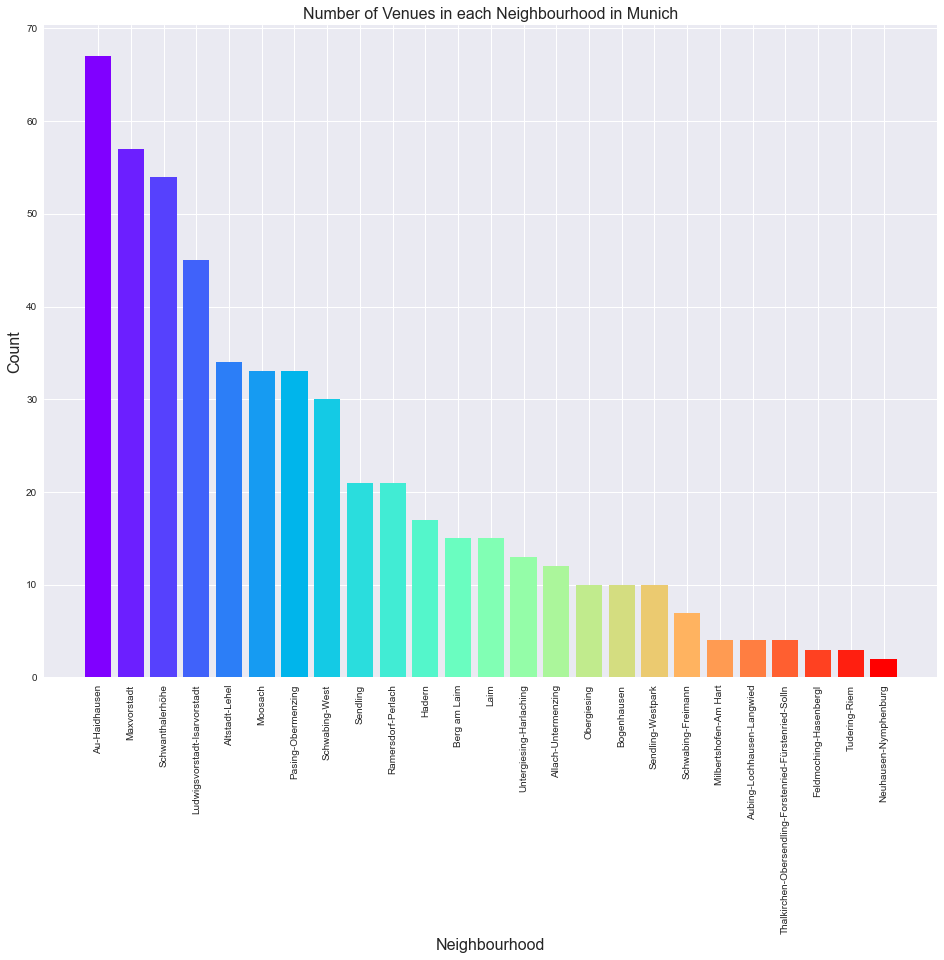

In [42]:
no_venues_mu.sort_values('No of Venues', ascending=False, inplace=True)
venues_mu = no_venues_mu['No of Venues']
neighbourhood_mu = no_venues_mu['Neighbourhood']


colours = cm.rainbow(np.linspace(0, 1, len(venues_mu.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Neighbourhood", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Number of Venues in each Neighbourhood in Munich", fontsize = 16)
plt.bar(neighbourhood_mu, venues_mu.values, color = colours)

# Zurich

In [43]:
try:
    df2 = pd.read_csv('Zurich_venue.csv')
except:
    df2 = return_venues_for_cities(zn_df)
#     df1.fillna(0,  inplace = True)
    df2.to_csv('Zurich_venue.csv',  index_label = False)
print('Shape data is: ', df2.shape)
df2.head()

Shape data is:  (34, 173)


,Neighbourhood,Latitude,Longitude,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop,Yoga Studio
0,Hirslanden,47.364757,8.575400,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Weinegg,47.353972,8.569414,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.100000,0.0,0.0,0.000000,0.0,0.000000,0.1,0.0
2,Mühlebach,47.357866,8.556663,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,...,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.033333,0.0,0.0
3,Seefeld,47.352464,8.551609,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Werd,47.372089,8.526816,0.0,0.0,0.0,0.0,0.021739,0.0,0.021739,...,0.0,0.0,0.000000,0.0,0.0,0.021739,0.0,0.000000,0.0,0.0


In [44]:
try:
    venues_in_Zurich = pd.read_csv('Zurich_ven_cat.csv')
except:
    venues_in_Zurich = getNearbyVenues(zu_neighbourhoods_df['neighbourhood'],
                                       zu_neighbourhoods_df['lat'],
                                       zu_neighbourhoods_df['lon'])
    venues_in_Zurich.to_csv('Zurich_ven_cat.csv',  index_label = False)
print('Shape data is: ', venues_in_Zurich.shape)
venues_in_Zurich.head()

Shape data is:  (940, 5)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Hirslanden,47.364757,8.5754,Wirtschaft Degenried,Swiss Restaurant
1,Hirslanden,47.364757,8.5754,VBZ Schlyfi,Bus Station
2,Hirslanden,47.364757,8.5754,Degenried,Other Great Outdoors
3,Hirslanden,47.364757,8.5754,Shipi-Nail Fondue 2000,Cosmetics Shop
4,Hirslanden,47.364757,8.5754,Elefantenbach,River


In [45]:
no_venues_zu = venues_in_Zurich.groupby('Neighbourhood', as_index=False).count()
no_venues_zu = no_venues_zu[['Neighbourhood','Venue']]
no_venues_zu.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_zu.head()

,Neighbourhood,No of Venues
0,Affoltern,8
1,Albisrieden,8
2,Alt-Wiedikon,17
3,Altstetten,7
4,City,69


<BarContainer object of 34 artists>

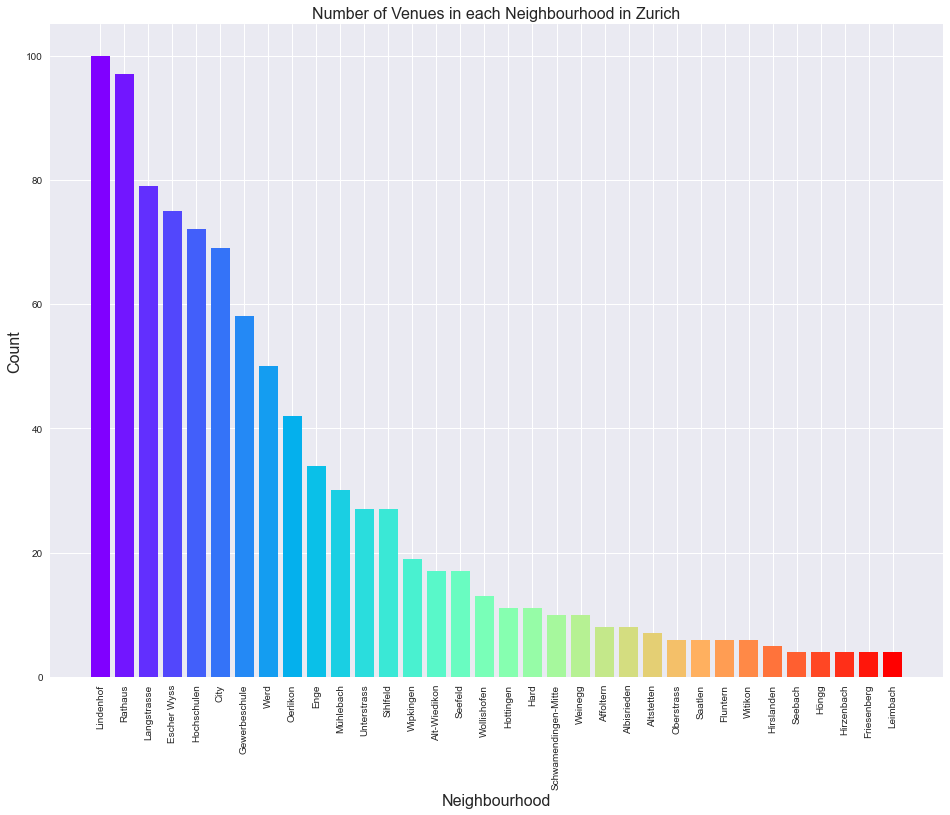

In [46]:
no_venues_zu.sort_values('No of Venues', ascending=False, inplace=True)
venues_zu = no_venues_zu['No of Venues']
neighbourhood_zu = no_venues_zu['Neighbourhood']


colours = cm.rainbow(np.linspace(0, 1, len(venues_zu.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Neighbourhood", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Number of Venues in each Neighbourhood in Zurich", fontsize = 16)
plt.bar(neighbourhood_zu, venues_zu.values, color = colours)

# Geneva

In [47]:
try:
    df3 = pd.read_csv('Geneva_venue.csv')
except:
    df3 = return_venues_for_cities(gn_df)
#     df1.fillna(0,  inplace = True)
    df3.to_csv('Geneva_venue.csv',  index_label = False)
print('Shape data is: ', df3.shape)
df3.head()

Shape data is:  (45, 113)


,Neighbourhood,Latitude,Longitude,Airport,Airport Terminal,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,Bakery,...,Theater,Tourist Information Center,Trail,Train Station,Tram Station,Watch Shop,Waterfront,Wine Bar,Wine Shop,Winery
0,Plan-les-Ouates,46.163930,6.119057,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.0,0.0
1,Lancy,46.184896,6.119612,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.142857,0.285714,0.0,0.0,0.000,0.0,0.0
2,Meinier,46.243001,6.235095,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.0,0.0
3,Carouge,46.181673,6.140353,0.0,0.0,0.0,0.0,0.0,0.0,0.025,...,0.025,0.0,0.0,0.000000,0.000000,0.0,0.0,0.025,0.0,0.0
4,Aire-la-Ville,46.190231,6.042232,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.0,0.0


In [48]:
try:
    venues_in_Geneva = pd.read_csv('Geneva_ven_cat.csv')
except:
    venues_in_Geneva = getNearbyVenues(ge_neighbourhoods_df['neighbourhood'],
                                       ge_neighbourhoods_df['lat'],
                                       ge_neighbourhoods_df['lon'])
    venues_in_Geneva.to_csv('Geneva_ven_cat.csv',  index_label = False)
print('Shape data is: ', venues_in_Geneva.shape)
venues_in_Geneva.head()

Shape data is:  (306, 5)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Plan-les-Ouates,46.163930,6.119057,Entreprise Vert-Tige,Garden Center
1,Plan-les-Ouates,46.163930,6.119057,Patinoire de Plan-Les-Ouates,Skating Rink
2,Plan-les-Ouates,46.163930,6.119057,Parc de la Garderie,Playground
3,Plan-les-Ouates,46.163930,6.119057,Le Chalet à Nico,Burger Joint
4,Lancy,46.184896,6.119612,Café Zinette,French Restaurant


In [49]:
no_venues_ge = venues_in_Geneva.groupby('Neighbourhood', as_index=False).count()
no_venues_ge = no_venues_ge[['Neighbourhood','Venue']]
no_venues_ge.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_ge.head()

,Neighbourhood,No of Venues
0,Aire-la-Ville,2
1,Anières,4
2,Avully,1
3,Bardonnex,4
4,Bellevue,3


<BarContainer object of 39 artists>

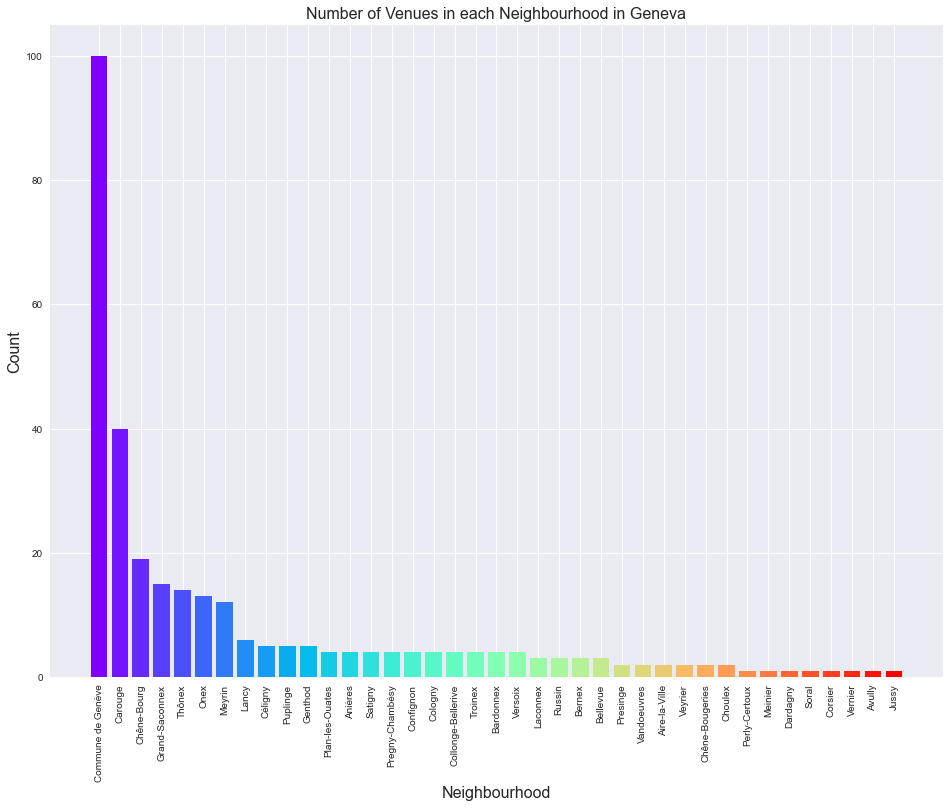

In [50]:
no_venues_ge.sort_values('No of Venues', ascending=False, inplace=True)
venues_ge = no_venues_ge['No of Venues']
neighbourhood_ge = no_venues_ge['Neighbourhood']


colours = cm.rainbow(np.linspace(0, 1, len(venues_ge.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Neighbourhood", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Number of Venues in each Neighbourhood in Geneva", fontsize = 16)
plt.bar(neighbourhood_ge, venues_ge.values, color = colours)

# London

In [51]:
try:
    df4 = pd.read_csv('London_venue.csv')
except:
    df4 = return_venues_for_cities(ln_df)
#     df1.fillna(0,  inplace = True)
    df4.to_csv('London_venue.csv',  index_label = False)
print('Shape data is: ', df4.shape)
df4.head()

Shape data is:  (33, 192)


,Neighbourhood,Latitude,Longitude,Accessories Store,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Kingston upon Thames,51.387906,-0.286900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Croydon,51.355335,-0.087157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bromley,51.371999,0.051524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hounslow,51.468378,-0.367123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.021277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ealing,51.522475,-0.331026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
try:
    venues_in_London = pd.read_csv('London_ven_cat.csv')
except:
    venues_in_London = getNearbyVenues(lo_neighbourhoods_df['neighbourhood'],
                                       lo_neighbourhoods_df['lat'],
                                       lo_neighbourhoods_df['lon'])
    venues_in_London.to_csv('London_ven_cat.csv',  index_label = False)
print('Shape data is: ', venues_in_London.shape)
venues_in_London.head()

Shape data is:  (809, 5)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Kingston upon Thames,51.387906,-0.286900,Coffee On The Corner,Coffee Shop
1,Kingston upon Thames,51.387906,-0.286900,La Monaliza,Colombian Restaurant
2,Kingston upon Thames,51.387906,-0.286900,"Cornerhouse Theatre, Douglas Road",Theater
3,Kingston upon Thames,51.387906,-0.286900,tolworth main allotments,Garden
4,Croydon,51.355335,-0.087157,Ginger Genie,Women's Store


In [53]:
venues_in_London.groupby('Venue Category').max()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue
Venue Category,,,,
African Restaurant,Haringey,51.590372,-0.107470,Le Chamarel
American Restaurant,Westminster,51.513899,0.140355,Hard Rock Cafe Oxford Street
Argentinian Restaurant,Westminster,51.513899,-0.161304,Casa Malevo
Art Gallery,Southwark,51.546394,-0.074602,Zabludowicz Collection
Asian Restaurant,Southwark,51.514845,-0.074602,wagamama
...,...,...,...,...
Wine Bar,Westminster,51.514845,-0.092171,Vinoteca
Wine Shop,Islington,51.548487,-0.110251,Provisions Wine & Cheese
Wings Joint,Hammersmith and Fulham,51.495954,-0.221290,Wing Wing


In [54]:
no_venues_lo = venues_in_London.groupby('Neighbourhood', as_index=False).count()
no_venues_lo = no_venues_lo[['Neighbourhood','Venue']]
no_venues_lo.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_lo.head()

,Neighbourhood,No of Venues
0,Barking and Dagenham,3
1,Barnet,2
2,Bexley,26
3,Brent,4
4,Camden,30


<BarContainer object of 32 artists>

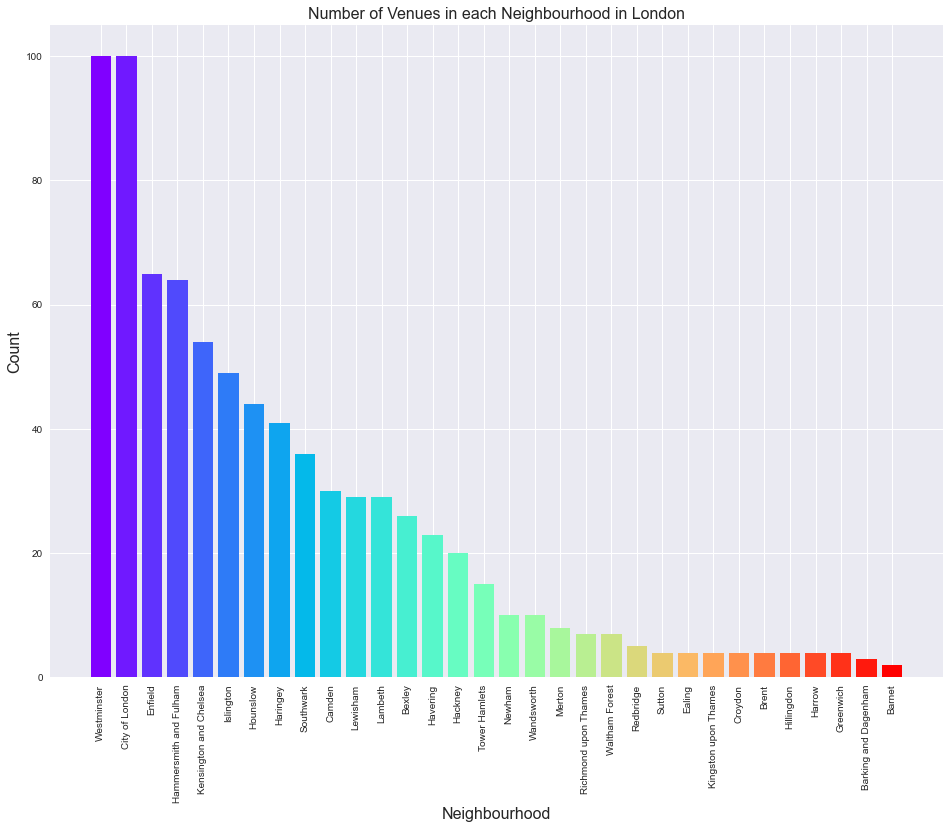

In [55]:
no_venues_lo.sort_values('No of Venues', ascending=False, inplace=True)
venues_lo = no_venues_lo['No of Venues']
neighbourhood_lo = no_venues_lo['Neighbourhood']


colours = cm.rainbow(np.linspace(0, 1, len(venues_lo.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Neighbourhood", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Number of Venues in each Neighbourhood in London", fontsize = 16)
plt.bar(neighbourhood_lo, venues_lo.values, color = colours)

# Comparisons

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

## Munich

In [58]:
Munich_venue_cat = pd.get_dummies(venues_in_Munich[['Venue Category']], prefix="", prefix_sep="")

Munich_venue_cat['Neighbourhood'] = venues_in_Munich['Neighbourhood'] 

# moving neighborhood column to the first column
fixed_columns = [Munich_venue_cat.columns[-1]] + list(Munich_venue_cat.columns[:-1])
Munich_venue_cat = Munich_venue_cat[fixed_columns]

Munich_grouped = Munich_venue_cat.groupby('Neighbourhood').mean().reset_index()
Munich_grouped.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio,Zoo Exhibit
0,Allach-Untermenzing,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.083333,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,Altstadt-Lehel,0.000000,0.0,0.0,0.0,0.029412,0.0,0.000000,0.029412,0.0,...,0.0,0.0,0.000000,0.029412,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,Au-Haidhausen,0.014925,0.0,0.0,0.0,0.000000,0.0,0.014925,0.000000,0.0,...,0.0,0.0,0.000000,0.014925,0.029851,0.014925,0.0,0.014925,0.0,0.0
3,Aubing-Lochhausen-Langwied,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,Berg am Laim,0.000000,0.0,0.0,0.0,0.000000,0.0,0.066667,0.000000,0.0,...,0.0,0.0,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [59]:
# create a new dataframe for Munich
neighborhoods_venues_sorted_Munich = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Munich['Neighbourhood'] = Munich_grouped['Neighbourhood']

for ind in np.arange(Munich_grouped.shape[0]):
    neighborhoods_venues_sorted_Munich.iloc[ind, 1:] = return_most_common_venues(Munich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Munich.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Supermarket,Drugstore,Park,Trattoria/Osteria,Bus Stop,German Restaurant,Bakery,Sporting Goods Shop,Italian Restaurant,Light Rail Station
1,Altstadt-Lehel,Plaza,Cocktail Bar,Hotel,Café,Opera House,Japanese Restaurant,Convenience Store,Historic Site,Nightclub,Palace
2,Au-Haidhausen,Café,Italian Restaurant,Plaza,Bakery,French Restaurant,German Restaurant,Bar,Ice Cream Shop,Cocktail Bar,Turkish Restaurant
3,Aubing-Lochhausen-Langwied,Design Studio,Sporting Goods Shop,Pharmacy,Supermarket,Palace,Newsstand,Nightclub,Opera House,Organic Grocery,Outdoor Gym
4,Berg am Laim,Supermarket,Bakery,Dog Run,Tram Station,Hotel,Bavarian Restaurant,Gastropub,Discount Store,Italian Restaurant,Asian Restaurant


## Zurich

In [60]:
Zurich_venue_cat = pd.get_dummies(venues_in_Zurich[['Venue Category']], prefix="", prefix_sep="")

Zurich_venue_cat['Neighbourhood'] = venues_in_Zurich['Neighbourhood'] 

# moving neighborhood column to the first column
fixed_columns = [Zurich_venue_cat.columns[-1]] + list(Zurich_venue_cat.columns[:-1])
Zurich_venue_cat = Zurich_venue_cat[fixed_columns]

Zurich_grouped = Zurich_venue_cat.groupby('Neighbourhood').mean().reset_index()
Zurich_grouped.head()

,Neighbourhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop,Yoga Studio
0,Affoltern,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.125,0.0,...,0.0,0.125,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,Albisrieden,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,...,0.0,0.000,0.125000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,Alt-Wiedikon,0.0,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.000,0.0,...,0.0,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,Altstetten,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,...,0.0,0.000,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,City,0.0,0.0,0.014493,0.0,0.0,0.014493,0.000000,0.000,0.0,...,0.0,0.000,0.000000,0.0,0.057971,0.0,0.014493,0.0,0.014493,0.0


In [61]:
# create a new dataframe for Zurich
neighborhoods_venues_sorted_Zurich = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Zurich['Neighbourhood'] = Zurich_grouped['Neighbourhood']

for ind in np.arange(Zurich_grouped.shape[0]):
    neighborhoods_venues_sorted_Zurich.iloc[ind, 1:] = return_most_common_venues(Zurich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Zurich.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Affoltern,Supermarket,Italian Restaurant,Department Store,Hotel,Athletics & Sports,Train Station,Bus Station,Other Great Outdoors,Movie Theater,Museum
1,Albisrieden,Bus Station,Restaurant,Playground,Tram Station,Swiss Restaurant,Bakery,Grocery Store,Accessories Store,Office,Moroccan Restaurant
2,Alt-Wiedikon,Restaurant,Italian Restaurant,Bakery,Pizza Place,Diner,Supermarket,Tapas Restaurant,Beer Garden,Thai Restaurant,Lounge
3,Altstetten,French Restaurant,Pool,Hotel,Supermarket,Tram Station,Swiss Restaurant,Market,Office,Moroccan Restaurant,Movie Theater
4,City,Bar,Italian Restaurant,Department Store,Vegetarian / Vegan Restaurant,Hotel,Plaza,Restaurant,Lounge,Coffee Shop,Cocktail Bar


## Geneva

In [62]:
Geneva_venue_cat = pd.get_dummies(venues_in_Geneva[['Venue Category']], prefix="", prefix_sep="")

Geneva_venue_cat['Neighbourhood'] = venues_in_Geneva['Neighbourhood'] 

# moving neighborhood column to the first column
fixed_columns = [Geneva_venue_cat.columns[-1]] + list(Geneva_venue_cat.columns[:-1])
Geneva_venue_cat = Geneva_venue_cat[fixed_columns]

Geneva_grouped = Geneva_venue_cat.groupby('Neighbourhood').mean().reset_index()
Geneva_grouped.head()

,Neighbourhood,Airport,Airport Terminal,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,Bakery,Bar,Bathing Area,...,Tourist Information Center,Trail,Train Station,Tram Station,Vineyard,Watch Shop,Waterfront,Wine Bar,Wine Shop,Winery
0,Aire-la-Ville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Anières,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Avully,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bardonnex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bellevue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# create a new dataframe for Geneva
neighborhoods_venues_sorted_Geneva = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Geneva['Neighbourhood'] = Geneva_grouped['Neighbourhood']

for ind in np.arange(Geneva_grouped.shape[0]):
    neighborhoods_venues_sorted_Geneva.iloc[ind, 1:] = return_most_common_venues(Geneva_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Geneva.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aire-la-Ville,Restaurant,Home Service,Airport,Paper / Office Supplies Store,Sandwich Place,Salad Place,Pub,Pool,Plaza,Playground
1,Anières,Beach,French Restaurant,Airport,Park,Sandwich Place,Salad Place,Restaurant,Pub,Pool,Plaza
2,Avully,Moving Target,Airport,Paper / Office Supplies Store,Sandwich Place,Salad Place,Restaurant,Pub,Pool,Plaza,Playground
3,Bardonnex,Soccer Field,Distillery,History Museum,French Restaurant,Airport,Park,Salad Place,Restaurant,Pub,Pool
4,Bellevue,Restaurant,Spa,Trail,Airport,Paper / Office Supplies Store,Salad Place,Pub,Pool,Plaza,Playground


## London

In [64]:
London_venue_cat = pd.get_dummies(venues_in_London[['Venue Category']], prefix="", prefix_sep="")

London_venue_cat['Neighbourhood'] = venues_in_London['Neighbourhood'] 

# moving neighborhood column to the first column
fixed_columns = [London_venue_cat.columns[-1]] + list(London_venue_cat.columns[:-1])
London_venue_cat = London_venue_cat[fixed_columns]

London_grouped = London_venue_cat.groupby('Neighbourhood').mean().reset_index()
London_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,Barnet,0.0,0.000000,0.0,0.000000,0.0,0.5,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,Bexley,0.0,0.038462,0.0,0.000000,0.0,0.0,0.038462,0.038462,0.0,...,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.000000
3,Brent,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.000000
4,Camden,0.0,0.000000,0.0,0.033333,0.0,0.0,0.033333,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333


In [65]:
# create a new dataframe for London
neighborhoods_venues_sorted_London = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_London['Neighbourhood'] = London_grouped['Neighbourhood']

for ind in np.arange(London_grouped.shape[0]):
    neighborhoods_venues_sorted_London.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_London.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Construction & Landscaping,Lake,Home Service,Plaza,Pakistani Restaurant,Park,Pedestrian Plaza,Persian Restaurant,Pharmacy,Piano Bar
1,Barnet,Athletics & Sports,Stables,African Restaurant,Pizza Place,Optical Shop,Outdoor Supply Store,Pakistani Restaurant,Park,Pedestrian Plaza,Persian Restaurant
2,Bexley,Coffee Shop,Pub,Clothing Store,Fast Food Restaurant,Supermarket,Pizza Place,Business Service,Burger Joint,Shopping Mall,Bowling Alley
3,Brent,Music Store,Scenic Lookout,Warehouse Store,Food Court,African Restaurant,Pizza Place,Outdoor Supply Store,Pakistani Restaurant,Park,Pedestrian Plaza
4,Camden,Café,Pub,Coffee Shop,Yoga Studio,Hotel,Sushi Restaurant,Pizza Place,Gymnastics Gym,Spa,Breakfast Spot


# Clustering

## K-means Model Construction

### Munich

In [66]:
# Set number of clusters
k_num = 7

Munich_grouped_clustering = Munich_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans_Munich = KMeans(n_clusters=k_num, random_state=0).fit(Munich_grouped_clustering)
kmeans_Munich

KMeans(n_clusters=7, random_state=0)

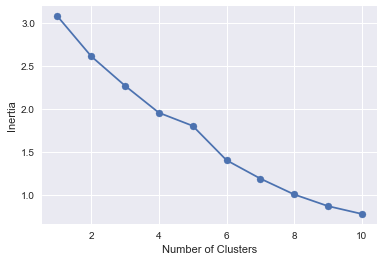

In [67]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(Munich_grouped_clustering)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [68]:
neighborhoods_venues_sorted_Munich.insert(0, 'Cluster Labels', kmeans_Munich.labels_ +1)

Munich_data = mn_df

Munich_data = Munich_data.join(neighborhoods_venues_sorted_Munich.set_index('Neighbourhood'), on='Neighbourhood')

Munich_data.groupby('Cluster Labels').max()

,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,
1,Milbertshofen-Am Hart,48.195994,11.567868,Museum,Bus Stop,Pastry Shop,Metro Station,Afghan Restaurant,Palace,Nightclub,Opera House,Organic Grocery,Outdoor Gym
2,Untergiesing-Harlaching,48.192805,11.643526,Zoo Exhibit,Tram Station,Vietnamese Restaurant,Trattoria/Osteria,Supermarket,Train Station,Pizza Place,Thai Restaurant,Supermarket,Vietnamese Restaurant
3,Neuhausen-Nymphenburg,48.156452,11.519305,Italian Restaurant,Canal,Afghan Restaurant,Paper / Office Supplies Store,Nightclub,Opera House,Organic Grocery,Outdoor Gym,Palace,Park
4,Aubing-Lochhausen-Langwied,48.164726,11.408340,Design Studio,Sporting Goods Shop,Pharmacy,Supermarket,Palace,Newsstand,Nightclub,Opera House,Organic Grocery,Outdoor Gym
5,Tudering-Riem,48.123764,11.683573,Home Service,Outdoor Gym,Park,Paper / Office Supplies Store,Newsstand,Nightclub,Opera House,Organic Grocery,Palace,Afghan Restaurant
6,Thalkirchen-Obersendling-Forstenried-Fürstenri...,48.086525,11.513238,Bus Stop,Arts & Crafts Store,Trail,Paper / Office Supplies Store,Newsstand,Nightclub,Opera House,Organic Grocery,Outdoor Gym,Palace
7,Feldmoching-Hasenbergl,48.215176,11.521979,German Restaurant,Greek Restaurant,Motorcycle Shop,Palace,Newsstand,Nightclub,Opera House,Organic Grocery,Outdoor Gym,Paper / Office Supplies Store


In [69]:
map_clusters_Munich = folium.Map(location=[latitude_Munich, longitude_Munich], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_num)
ys = [i + x + (i*x)**2 for i in range(k_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(Munich_data['Latitude'],
                                            Munich_data['Longitude'],
                                            Munich_data['Neighbourhood'],
                                            Munich_data['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Munich)
       
map_clusters_Munich

### Zurich

In [70]:
# Set number of clusters
k_num = 5

Zurich_grouped_clustering = Zurich_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans_Zurich = KMeans(n_clusters=k_num, random_state=0).fit(Zurich_grouped_clustering)
kmeans_Zurich

KMeans(n_clusters=5, random_state=0)

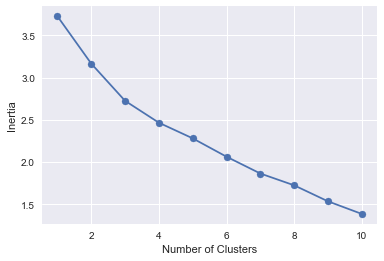

In [71]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(Zurich_grouped_clustering)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [72]:
neighborhoods_venues_sorted_Zurich.insert(0, 'Cluster Labels', kmeans_Zurich.labels_ +1)

Zurich_data = zn_df

Zurich_data = Zurich_data.join(neighborhoods_venues_sorted_Zurich.set_index('Neighbourhood'), on='Neighbourhood')

Zurich_data.groupby('Cluster Labels').max()

,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,
1,Wipkingen,47.408739,8.577778,Swiss Restaurant,Swiss Restaurant,Swiss Restaurant,Vietnamese Restaurant,Swiss Restaurant,Thai Restaurant,Tram Station,Vegetarian / Vegan Restaurant,Wine Bar,Thai Restaurant
2,Hirzenbach,47.400156,8.585452,Tram Station,Steakhouse,Accessories Store,Other Great Outdoors,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nightclub
3,Wollishofen,47.422893,8.599741,Supermarket,Tram Station,Supermarket,Tram Station,Trail,Train Station,Plaza,Salon / Barbershop,Office,Pub
4,Höngg,47.408293,8.495744,Bus Station,Steakhouse,Soccer Field,Accessories Store,Optical Shop,Movie Theater,Museum,Music Store,Music Venue,Nightclub
5,Weinegg,47.395503,8.569414,Tram Station,Wine Shop,Tram Station,Tram Station,Tram Station,Swiss Restaurant,Supermarket,Plaza,Swiss Restaurant,Tennis Court


In [73]:
map_clusters_Zurich = folium.Map(location=[latitude_Zurich, longitude_Zurich], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k_num)
ys = [i + x + (i*x)**2 for i in range(k_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(Zurich_data['Latitude'],
                                            Zurich_data['Longitude'],
                                            Zurich_data['Neighbourhood'],
                                            Zurich_data['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Zurich)
       
map_clusters_Zurich

### Geneva

In [74]:
# Set number of clusters
k_num = 5

Geneva_grouped_clustering = Geneva_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans_Geneva = KMeans(n_clusters=k_num, random_state=0).fit(Geneva_grouped_clustering)
kmeans_Geneva

KMeans(n_clusters=5, random_state=0)

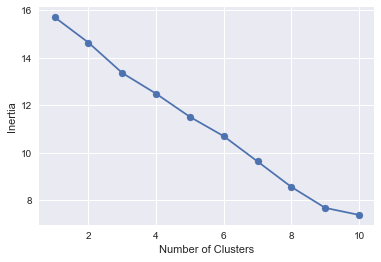

In [75]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(Geneva_grouped_clustering)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [76]:
neighborhoods_venues_sorted_Geneva.insert(0, 'Cluster Labels', kmeans_Geneva.labels_ +1)

Geneva_data = gn_df

Geneva_data = Geneva_data.join(neighborhoods_venues_sorted_Geneva.set_index('Neighbourhood'), on='Neighbourhood')

Geneva_data_new = Geneva_data.dropna()
Geneva_data_new['Cluster Labels'] = Geneva_data_new['Cluster Labels'].astype('int')

Geneva_data_new.groupby('Cluster Labels').max()

C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,
1,Veyrier,46.254665,6.203664,Restaurant,Spa,Trail,Sandwich Place,Sandwich Place,Salad Place,Pub,Pool,Plaza,Playground
2,Perly-Certoux,46.158084,6.087883,Soccer Field,Airport,Shoe Store,Sandwich Place,Salad Place,Restaurant,Pub,Pool,Plaza,Playground
3,Versoix,46.347291,6.279121,Winery,Tram Station,Vineyard,Tram Station,Smoke Shop,Theater,Tea Room,Swiss Restaurant,Supermarket,Swiss Restaurant
4,Soral,46.148108,6.047346,Brewery,Airport,Shoe Store,Sandwich Place,Salad Place,Restaurant,Pub,Pool,Plaza,Playground
5,Dardagny,46.198490,5.989070,Winery,Paper / Office Supplies Store,Sandwich Place,Salad Place,Restaurant,Pub,Pool,Plaza,Playground,Pizza Place


In [77]:
map_clusters_Geneva = folium.Map(location=[latitude_Geneva, longitude_Geneva], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_num)
ys = [i + x + (i*x)**2 for i in range(k_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(Geneva_data_new['Latitude'],
                                            Geneva_data_new['Longitude'],
                                            Geneva_data_new['Neighbourhood'],
                                            Geneva_data_new['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Geneva)
       
map_clusters_Genevamap_clusters_Geneva = folium.Map(location=[latitude_Geneva, longitude_Geneva], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_num)
ys = [i + x + (i*x)**2 for i in range(k_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(Geneva_data_new['Latitude'],
                                            Geneva_data_new['Longitude'],
                                            Geneva_data_new['Neighbourhood'],
                                            Geneva_data_new['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Geneva)
       
map_clusters_Geneva

### London

In [78]:
# Set number of clusters
k_num = 8

London_grouped_clustering = London_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans_London = KMeans(n_clusters=k_num, random_state=0).fit(London_grouped_clustering)
kmeans_London

KMeans(random_state=0)

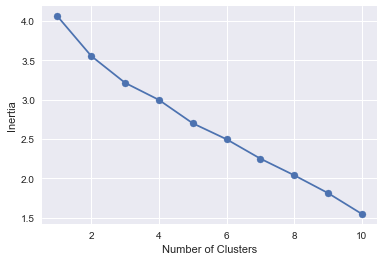

In [79]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(London_grouped_clustering)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [80]:
neighborhoods_venues_sorted_London.insert(0, 'Cluster Labels', kmeans_London.labels_ +1)

London_data = ln_df

London_data = London_data.join(neighborhoods_venues_sorted_London.set_index('Neighbourhood'), on='Neighbourhood')

London_data_new = London_data.dropna()
London_data_new['Cluster Labels'] = London_data_new['Cluster Labels'].astype('int')

London_data_new.groupby('Cluster Labels').max()

C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,
1,Waltham Forest,51.594033,0.221108,Supermarket,Yoga Studio,Pub,Yoga Studio,Trail,Toy / Game Store,Pizza Place,Restaurant,Vietnamese Restaurant,Restaurant
2,Barnet,51.616027,-0.210017,Athletics & Sports,Stables,African Restaurant,Pizza Place,Optical Shop,Outdoor Supply Store,Pakistani Restaurant,Park,Pedestrian Plaza,Persian Restaurant
3,Westminster,51.650995,0.140355,Women's Store,Supermarket,Sandwich Place,Wine Bar,Supermarket,Trail,Steakhouse,Supermarket,Yoga Studio,Spa
4,Barking and Dagenham,51.545277,0.133528,Construction & Landscaping,Lake,Home Service,Plaza,Pakistani Restaurant,Park,Pedestrian Plaza,Persian Restaurant,Pharmacy,Piano Bar
5,Harrow,51.597723,-0.341267,Indian Restaurant,Kitchen Supply Store,Clothing Store,Coffee Shop,African Restaurant,Platform,Pakistani Restaurant,Park,Pedestrian Plaza,Persian Restaurant
6,Ealing,51.522475,-0.331026,Rugby Pitch,Sports Club,Park,Train Station,African Restaurant,Piano Bar,Optical Shop,Outdoor Supply Store,Pakistani Restaurant,Pedestrian Plaza
7,Kingston upon Thames,51.387906,-0.286900,Garden,Theater,Coffee Shop,Colombian Restaurant,Optical Shop,Outdoor Supply Store,Pakistani Restaurant,Park,Pedestrian Plaza,Persian Restaurant
8,Brent,51.558556,-0.267821,Music Store,Scenic Lookout,Warehouse Store,Food Court,African Restaurant,Pizza Place,Outdoor Supply Store,Pakistani Restaurant,Park,Pedestrian Plaza


In [81]:
map_clusters_London = folium.Map(location=[latitude_London, longitude_London], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k_num)
ys = [i + x + (i*x)**2 for i in range(k_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(London_data_new['Latitude'],
                                            London_data_new['Longitude'],
                                            London_data_new['Neighbourhood'],
                                            London_data_new['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_London)
       
map_clusters_London